In [133]:
import os#
os.chdir('c:\\Users\\ma11115\\OneDrive - Imperial College London\\github_folder\\STK_SEARCH\\')
#os.chdir("/rds/general/user/ma11115/home/STK_Search/STK_search")
from pathlib import Path#

import pandas as pd
import torch


import numpy as np
from stk_search.utils.config_utils import read_config, save_config
from stk_search.utils import update_datasets
import importlib
importlib.reload(update_datasets)
os.makedirs('data/output/search_experiment/search_exp_database', exist_ok=True)

In [134]:
# load Search space and check conditions
import pickle
search_space_loc = "data/input/STK_search_space/search_space_test.pkl"

save_dir = 'data/input/STK_search_space'
id = 'test'
SP = pickle.load(open(save_dir+f'/search_space_{id}.pkl', 'rb'))
SP.update()
print(SP.syntax)
print(SP.conditions_list)
print(f"size of the search space is : {SP.get_space_size():.2e}")
SP.df_precursors.head()

[0, 1, 2, 3, 4, 5]
[[], [], [], [], [], []]
size of the search space is : 4.23e+14


,InChIKey,Atom_num,HOMO (eV),LUMO (eV),HOMO_LUMO_GAP (eV),IP (eV),EA (eV),total energy (eV) vipea,First excited state Energy (eV),First excited osc,...,pca9,check,mol_opt_smiles,mol_org,mol_org_smile,ECFP,num_atoms,num_rings,cluster,orgcluster
0,KYORXLIHDAZXPK-UHFFFAOYSA-N,25,-11.5745,-10.1316,1.442883,7.1531,3.8935,-1699.611759,"[2.97, 3.437, 3.827, 3.901, 4.181]","[0.1323, 0.3332, 0.001, 0.4911, 0.5211]",...,1.909060,1,<rdkit.Chem.rdchem.Mol object at 0x000002D7068...,<rdkit.Chem.rdchem.Mol object at 0x000002D7068...,C=C1C(=O)c2c(sc3ccccc23)C1=C(C#N)C#N,"[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, ...",25.0,3.0,0,0
2,UVCFYBOLMFIWGF-FPYGCLRLSA-N,22,-11.6536,-9.8300,1.823610,7.5190,4.1701,-1426.075709,"[3.543, 3.828, 3.987, 4.107, 4.23]","[0.0026, 0.1704, 0.206, 0.2256, 0.0395]",...,0.540030,1,<rdkit.Chem.rdchem.Mol object at 0x000002D706A...,<rdkit.Chem.rdchem.Mol object at 0x000002D7068...,[H]/C=C1\C(=O)c2c(F)cccc2C1=C(C#N)C#N,"[1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, ...",22.0,2.0,0,2
3,PQZAHLJJGPAGBD-OQFOIZHKSA-N,22,-11.5774,-9.8714,1.706007,7.5324,4.1806,-1426.205720,"[3.779, 3.813, 4.035, 4.115, 4.429]","[0.0002, 0.0277, 0.1648, 0.3408, 0.0013]",...,1.014201,1,<rdkit.Chem.rdchem.Mol object at 0x000002D706A...,<rdkit.Chem.rdchem.Mol object at 0x000002D7068...,[H]/C=C1\C(=O)c2ccc(F)cc2C1=C(C#N)C#N,"[1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, ...",22.0,2.0,0,3
4,HFUBKQHDPJZQIW-UHFFFAOYSA-N,13,-11.6185,-9.5986,2.019861,7.7105,3.7821,-1085.337355,"[4.436, 4.438, 5.127, 5.751, 5.826]","[0.2419, 0.2902, 0.0, 0.0, 0.0098]",...,1.085874,1,<rdkit.Chem.rdchem.Mol object at 0x000002D706A...,<rdkit.Chem.rdchem.Mol object at 0x000002D7068...,Fc1cc2c(cc1F)N=S=N2,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...",13.0,2.0,1,4
5,XORWEKRDQCXPID-UHFFFAOYSA-N,28,-11.3061,-9.1919,2.114258,7.1941,3.5724,-1474.375137,"[3.81, 3.855, 4.251, 4.645, 4.799]","[0.1441, 0.2486, 0.0869, 0.0024, 0.0025]",...,0.097783,1,<rdkit.Chem.rdchem.Mol object at 0x000002D706A...,<rdkit.Chem.rdchem.Mol object at 0x000002D7068...,CCN1C(=O)c2cccc3cccc(c23)C1=O,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",28.0,3.0,1,5


In [135]:
from stk_search.Objective_function import  Look_up_table
df_total_path = "data/output/Full_dataset/New_target07072024.csv"
df_total = pd.read_csv(df_total_path)
oligomer_size = 6
target_name = 'target'
aim = 'maximise'
df_total['target'] = (
        -np.abs(df_total["ES1"] - 3)
        - np.abs(df_total["ionisation potential (eV)"] - 5.5)
        + np.log10(df_total["fosc1"])
    )
# define the evaluation function
objective_function = Look_up_table(
            df_total, oligomer_size, target_name=target_name, aim=aim
        )

In [136]:
# test evaluation function
molecule_id = 0
molecule_properties = SP.check_df_for_element_from_SP(df_total).iloc[[molecule_id]]
print(molecule_properties['InChIKey'])
molecule_properties[[f'InChIKey_{x}' for x in range(oligomer_size)]]
objective_function.evaluate_element(molecule_properties[[f'InChIKey_{x}' for x in range(oligomer_size)]])

0    AAAIKLIUXQWZQC-SBRRWJCQSA-N
Name: InChIKey, dtype: object


(-3.0251355934769806, 'AAAIKLIUXQWZQC-SBRRWJCQSA-N')

In [137]:
# initialise search algorithm 
from stk_search.Search_algorithm import BayesianOptimisation

which_acquisition = 'EI'
lim_counter = 10
BO = BayesianOptimisation.BayesianOptimisation(which_acquisition=which_acquisition, lim_counter=lim_counter)

In [138]:
# initialise the representation of the molecules used
# here we use the dataframe of the precursors that has PCA of desrciprtors calculated using mordred
from stk_search.Representation import (
    Representation_from_fragment,
    Representation_3d_from_fragment,
)

df_representation_path = "data/input/Prescursor_data/df_mordred_10072024.pkl"
df_representation = pd.read_pickle(df_representation_path)
df_representation.dropna(axis=1, inplace=True)
# check if the representation dataframe contains all the elements in teh search space
print(
    "number of element not in the representation dataframe ",
    -(SP.df_precursors["InChIKey"].isin(df_representation["InChIKey"]).sum()
    - SP.df_precursors.shape[0]),
)
if -(SP.df_precursors["InChIKey"].isin(df_representation["InChIKey"]).sum() - SP.df_precursors.shape[0]) > 0:
    SP.df_precursors = SP.df_precursors[SP.df_precursors["InChIKey"].isin(df_representation["InChIKey"])]
    with open(search_space_loc, "wb") as f:
        pickle.dump(SP, f)
frag_properties = df_representation.select_dtypes(include=[np.number]).columns
print(frag_properties)
BO.Representation = Representation_from_fragment.Representation_from_fragment(
    df_representation, frag_properties
)
search_algorithm = BO

number of element not in the representation dataframe  35
Index(['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7',
       'PCA_8', 'PCA_9'],
      dtype='object')


In [139]:
# test representation
molecule_id = 0
molecule_properties = SP.check_df_for_element_from_SP(df_total).iloc[[molecule_id]]
print(molecule_properties['InChIKey'])
molecule_properties[[f'InChIKey_{x}' for x in range(oligomer_size)]]
BO.Representation.generate_repr(molecule_properties[[f'InChIKey_{x}' for x in range(oligomer_size)]])


1    AAALPPGKJQYWNO-NOPDUFPGSA-N
Name: InChIKey, dtype: object


tensor([[-24320.9004,   -772.3133,   5207.2749,   -229.0617,  -1341.0376,
           1074.9396,   3849.9409,   2679.7773,   3412.2344,  -1256.6033,
          -3584.3877,  -1815.9335,   -557.8451,   2665.9617,   5035.4893,
          -1106.4846,  -3513.0127,   -389.4176,   -472.5443,    671.6335,
         -19971.6426,   1884.8226,   7658.7778,  -3023.5808,  -3403.5728,
            438.2007,   1252.1992,  -1644.2726,   -819.7853,   2486.9592,
         -35831.1484,  -8955.9580,   3934.3582,   -975.6628,  -1835.8807,
            -46.1821,  -2437.0107,   -821.1607,   -208.6511,  -1208.6829,
           9916.8340,    923.7471,    835.1589,   7222.7358,   -988.2985,
            102.3317,  -1280.5314,  -4478.7964,   2462.2729,  -4013.8882,
         -16407.9395,  -5737.2549,  -3531.8469,  -2856.0901,   -336.4821,
           1569.5612,   2231.4702,   2215.2090,   -761.6638,  -1846.4196]])

In [141]:
from stk_search import SearchExp
importlib.reload(SearchExp)
# set experiment conditions
num_elem_initialisation=50
num_iteration=2
number_of_iterations = num_iteration
verbose = True
S_exp = SearchExp.SearchExp(
        SP,
        search_algorithm,
        objective_function,
        number_of_iterations,
        verbose=verbose,
    )
test_name = 'test'
benchmark  = True
S_exp.output_folder = (
        f"data/output/search_experiment/{oligomer_size}_frag/" + test_name
    )
S_exp.num_elem_initialisation = num_elem_initialisation
S_exp.benchmark = benchmark
S_exp.df_total = df_total


In [142]:
# Save search inputs
import json
import subprocess
def save_run_search_inputs(inputs, save_path="run_search_new_inputs.json"):
    # Get the current git version
    git_version = (
        subprocess.check_output(["git", "rev-parse", "HEAD"])
        .strip()
        .decode("utf-8")
    )

    # Add the git version to the inputs
    inputs["git_version"] = git_version

    # Save the inputs to a file
    with open(save_path, "w") as f:
        json.dump(inputs, f)

    print("Inputs saved.")
input_json ={}
input_json["search_space_loc"] = search_space_loc
input_json["search_algorithm"] = search_algorithm.__str__()
input_json["objective_function"] = objective_function.__str__()
input_json["number_of_iterations"] = number_of_iterations
input_json["verbose"] = verbose
input_json["num_elem_initialisation"] = num_elem_initialisation
input_json["benchmark"] = benchmark
input_json["df_total"] = df_total_path
input_json["df_representation"] = df_representation_path
input_json["frag_properties"] = list(frag_properties)
input_json["run_search_name"] = S_exp.search_exp_name
input_json["search_output_folder"] = S_exp.output_folder
input_json["date"] = S_exp.date
save_path = f"data/output/search_experiment/search_exp_database/{S_exp.search_exp_name}.json"
save_run_search_inputs(input_json, save_path)

Inputs saved.


In [143]:
S_exp.run_seach()

element Inchikey suggested: BBTFWAQHKAROAM-BOABNOFISA-N, Eval: 0.05634744890187671
element Inchikey suggested: XUUMPGVJKHRARQ-UHFFFAOYSA-N, Eval: -2.4705088337630894
element Inchikey suggested: GQSHOEURXDTVAD-UHFFFAOYSA-N, Eval: 0.4654129311852244
element Inchikey suggested: KQEALFZFRFNBBH-UHFFFAOYSA-N, Eval: -1.6862864715952273
element Inchikey suggested: UHSDTMGDFIOMND-HHVXFKTKSA-N, Eval: -1.2250425159091916
element Inchikey suggested: XFXKBWXBVXQJOB-IUKKDTJPSA-N, Eval: -1.29909294341931
element Inchikey suggested: AFXDUQUTIIXYRA-NOVPWQJISA-N, Eval: -1.9780259591403617
element Inchikey suggested: HYKDGQJRULXNEB-CULHFBHGSA-N, Eval: -1.0513481582243376
element Inchikey suggested: LRSNETDUNHLGMB-UHFFFAOYSA-N, Eval: -1.1946702323401024
element Inchikey suggested: DUIABLSXZKJXJF-UFFVCSGVSA-N, Eval: -1.2776892530216646
element Inchikey suggested: RSNVVJMYDBGNGR-UHFFFAOYSA-N, Eval: 0.2113750128007833
element Inchikey suggested: GBVBMSXUHHPSMF-UHFFFAOYSA-N, Eval: -0.3857029713177154
element 

{'ids_acquired': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 'searched_space_df':                      InChIKey_0                   InChIKey_1  \
 0   MSUPZGGVRIRXAI-UHFFFAOYSA-N  KEPNBEPTGHROGD-UHFFFAOYSA-N   
 1   VQAFMTSSCUETHA-UHFFFAOYSA-N  UANFRSYASSMVLC-UHFFFAOYSA-N   
 2   UEWMYKHULZNSCE-UHFFFAOYSA-N  KEPNBEPTGHROGD-UHFFFAOYSA-N   
 3   QKOAHMWMROSOCB-UHFFFAOYSA-N  WVGHJMFKJADIAM-UHFFFAOYSA-N   
 4   KYORXLIHDAZXPK-UHFFFAOYSA-N  CWRLVIASPCAZBH-WMZJFQQLSA-N   
 5   LYRNKIZEZSJWMV-WMZJFQQLSA-N  UVCFYBOLMFIWGF-FPYGCLRLSA-N   
 6   QKOAHMWMROSOCB-UHFFFAOYSA-N  SWJPEBQEEAHIGZ-UHFFFAOYSA-N   
 7   KYORXLIHDAZXPK-UHFFFAOYSA-N  WKLIPXVAVURITR-UHFFFAOYSA-N   
 8   KYORXLIHDAZXPK-UHFFFAOYSA-N  SNMJIXVGAOBXCS-UHFFFAOYSA-N   
 9   HFUBK

## using a helper function 

In [151]:
# run a search experiment with the new target
from stk_search.utils import run_hpc_utils
importlib.reload(run_hpc_utils)
case_name = 'BO_precursor'#'BO_learned'
df_total_path = "data/output/Full_dataset/New_target200324.csv"
df_representation_path ="data/output/Prescursor_data/precursor_data_200324.pkl"
exp_name = "new_target"
search_space_loc = "data/input/STK_search_space/search_space_test.pkl"
which_acquisition = "EI"

string_to_run_notbook, script_qsub = run_hpc_utils.generate_string_run(
                case=case_name,
                target="target",
                aim='maximise',
                num_elem_initialisation=50,
                num_iteration=2,
                df_path=df_total_path,
                benchmark=True,
                test_name= exp_name,
                df_representation_path=df_representation_path,
                frag_properties="selected",
                search_space_loc = search_space_loc,
                which_acquisition = which_acquisition,
            )

%run $string_to_run_notbook

src/dev_scripts/run_search_new.py  --case BO_precursor --test_name new_target --target target --aim maximise --benchmark 1 --num_iteration 2 --num_elem_initialisation 50 --which_acquisition EI --df_path data/output/Full_dataset/New_target200324.csv --df_representation_path data/output/Prescursor_data/precursor_data_200324.pkl --config_dir /rds/general/user/ma11115/home/Geom3D/Geom3D/training/SchNet_frag/ --search_space_loc data/input/STK_search_space/search_space_test.pkl --frag_properties selected --lim_counter 10 --budget None
 number of fragment 6
True benchmark


C:\Users\ma11115\OneDrive - Imperial College London\github_folder\STK_search\src\dev_scripts\run_search_new.py:55: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total = pd.read_csv(df_path)


BO_precursor   case  
Index(['Atom_num', 'HOMO (eV)', 'LUMO (eV)', 'HOMO_LUMO_GAP (eV)', 'IP (eV)',
       'EA (eV)', '1 Excited state Energy (eV)', '1 Excited state Osc',
       '2 Excited state Energy (eV)', '2 Excited state Osc',
       '3 Excited state Energy (eV)', '3 Excited state Osc'],
      dtype='object')
Inputs saved.
element Inchikey suggested: NRPIZBKWOOPJGB-UHFFFAOYSA-N, Eval: -2.5641753736965915
element Inchikey suggested: JMISVFMEYGTIEG-UHFFFAOYSA-N, Eval: -1.6005010078674289
element Inchikey suggested: JWNPIVKLTUWVIL-UHFFFAOYSA-N, Eval: -1.6412637832366883
element Inchikey suggested: RJRJHAZGKPFEBC-UHFFFAOYSA-N, Eval: -1.3585102704874892
element Inchikey suggested: KIIBPIDMZNPYIW-UHFFFAOYSA-N, Eval: -1.8781797003999936
element Inchikey suggested: ZSTJKBBZVDMIPN-RGXNXFOYSA-N, Eval: -3.139972006437063
element Inchikey suggested: GCWWWPOYINYJCC-UHFFFAOYSA-N, Eval: -1.068067629818196
element Inchikey suggested: UZXCCIZELPQHTE-YRMWGRGYSA-N, Eval: 0.0588702864959189
element 

# load results and plot some metrics

In [153]:

import glob
import pickle
import json
def load_search_list(df):
    search_list = []
    for index, row in df.iterrows():
        search_list.append(pickle.load(open(row['search_exp_file'], "rb")))
    return search_list
save_path = f"data/output/search_experiment/search_exp_database"
json_files = glob.glob(f"{save_path}/*.json")
list_json = []
for json_file in json_files:
    try:
        with open(json_file, 'r') as f:
            list_json.append(json.load(f))
        f.close()
    except: 
        print('error oppening',json_file)
df = pd.DataFrame(list_json)
df['search_exp_file'] = df['search_output_folder']+"/"+df['date']+"/results_"+df['run_search_name']+'.pkl'
#df = df[~df['benchmark']]
print(df.shape)
df_all = df.copy()
df_all.head()


error oppening data/output/search_experiment/search_exp_database\1101c72c16fc4318bfaa0c5860604d88.json
error oppening data/output/search_experiment/search_exp_database\27c807a0624b46299dfcce068e202f33.json
error oppening data/output/search_experiment/search_exp_database\a0f4300088cd4ed3871e32c30d160c7b.json
error oppening data/output/search_experiment/search_exp_database\fdde69a40eb44bd88301f3e7c68a170a.json
(22, 29)


,search_space_loc,search_algorithm,objective_function,number_of_iterations,verbose,num_elem_initialisation,benchmark,df_total,df_representation,frag_properties,...,aim,which_acquisition,lim_counter,oligomer_size,df_path,df_precursors_path,dataset_representation_path,budget,df_representation_path,search_exp_file
0,data/input/STK_search_space/search_space_test.pkl,<stk_search.Search_algorithm.BayesianOptimisat...,<stk_search.Objective_function.Look_up_table o...,20.0,True,50,True,data/output/Full_dataset/New_target07072024.csv,data/input/Prescursor_data/df_mordred_10072024...,"[PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data/output/search_experiment/6_frag/test/2024...
1,data/input/search_space/test/search_space1.pkl,NaN,NaN,NaN,NaN,50,True,NaN,NaN,selected,...,maximise,EI,10.0,6.0,data/output/Full_dataset/New_target200324.csv,data/output/Prescursor_data/precursor_data_200...,,NaN,NaN,data/output/search_experiment/6_frag/new_targe...
2,data/input/STK_search_space/search_space_test.pkl,<stk_search.Search_algorithm.BayesianOptimisat...,<stk_search.Objective_function.Look_up_table o...,20.0,True,50,True,data/output/Full_dataset/New_target07072024.csv,data/input/Prescursor_data/df_mordred_10072024...,"[PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data/output/search_experiment/6_frag/test/2024...
3,data/input/STK_search_space/search_space_test.pkl,<stk_search.Search_algorithm.BayesianOptimisat...,<stk_search.Objective_function.Look_up_table o...,20.0,True,50,True,data/output/Full_dataset/New_target07072024.csv,data/input/Prescursor_data/df_mordred_10072024...,"[PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data/output/search_experiment/6_frag/test/2024...
4,data/input/search_space/test/search_space1.pkl,NaN,NaN,NaN,NaN,50,True,NaN,NaN,selected,...,maximise,EI,10.0,6.0,data/output/Full_dataset/New_target200324.csv,data/output/Prescursor_data/precursor_data_200...,,NaN,NaN,data/output/search_experiment/6_frag/new_targe...


In [157]:
num_iteration = 20
num_elem_initialisation = 50
oligomer_size = 6 
#df_filtered = df_all[df_all['num_iteration']==num_iteration]
#df_filtered = df_filtered[df_filtered['num_elem_initialisation']==num_elem_initialisation]
df_filtered = df_all[df_all['oligomer_size']==oligomer_size]
print(df_filtered.shape)
df_list = df_filtered.groupby(['case','frag_properties','which_acquisition','config_dir'])
print(len(df_list))
df_filtered.groupby(['case','frag_properties','which_acquisition','config_dir']).describe()

(13, 29)
2


number_of_iterations  \
                                                                                                                                 count   
case                         frag_properties which_acquisition config_dir                                                                
BO_precursor                 selected        EI                /rds/general/user/ma11115/home/Geom3D/Geom3D/tr...                  0.0   
BayesianOptimisation_ErrPred all             UCB_GNN           data/representation_learning/splitrand-nummol20000                  0.0   

                                                                                                                        \
                                                                                                                  mean   
case                         frag_properties which_acquisition config_dir                                                
BO_precursor                 selected        EI                /rds/general/user/ma11115/home/Geom3D/Geom3D/tr...  NaN   
BayesianOptimisation_ErrPred all             UCB_GNN           data/representation_learning/splitrand-nummol20000  NaN   

                                                                                                                       \
                                                                                                                  std   
case                         frag_properties which_acquisition config_dir                                               
BO_precursor                 selected        EI                /rds/general/user/ma11115/home/Geom3D/Geom3D/tr... NaN   
BayesianOptimisation_ErrPred all             UCB_GNN           data/representation_learning/splitrand-nummol20000 NaN   

                                                                                                                       \
                                                                                                                  min   
case                         frag_properties which_acquisition config_dir                                               
BO_precursor                 selected        EI                /rds/general/user/ma11115/home/Geom3D/Geom3D/tr... NaN   
BayesianOptimisation_ErrPred all             UCB_GNN           data/representation_learning/splitrand-nummol20000 NaN   

                                                                                                                       \
                                                                                                                  25%   
case                         frag_properties which_acquisition config_dir                                               
BO_precursor                 selected        EI                /rds/general/user/ma11115/home/Geom3D/Geom3D/tr... NaN   
BayesianOptimisation_ErrPred all             UCB_GNN           data/representation_learning/splitrand-nummol20000 NaN   

                                                                                                                       \
                                                                                                                  50%   
case                         frag_properties which_acquisition config_dir                                               
BO_precursor                 selected        EI                /rds/general/user/ma11115/home/Geom3D/Geom3D/tr... NaN   
BayesianOptimisation_ErrPred all             UCB_GNN           data/representation_learning/splitrand-nummol20000 NaN   

                                                                                                                       \
                                                                                                                  75%   
case                         frag_properties which_acquisition config_dir                                               
BO_precursor             

In [162]:
import pandas as pd
def join_name(x):
    return '_'.join(x)

def load_search_list(df,min_num_iteration):
    search_list = []
    for index, row in df.iterrows():
        if min_num_iteration <= row['max_num_eval']:
            search_list.append(pd.read_pickle(row['search_exp_file']))
    return search_list
def get_results_length(x):
    try:
        return len(pd.read_pickle(x)['fitness_acquired'])
    except Exception as e:
        #print(e)
        return 0
results_dict = {}
num_searches_with_min, df_plot_dict = {}, {}
min_num_iteration = 70
for name , df in df_list:
    if len(df) != 0: 
        df['max_num_eval']=df['search_exp_file'].apply(lambda x: get_results_length(x))
        key = join_name(name)
        df['key'] = key
        if df['max_num_eval'].max() >= min_num_iteration:
            results_dict[key] = load_search_list(df,min_num_iteration)
            num_searches_with_min[key] = (len(results_dict[key]), df['df_path'].values[0])
df_summary_1 = pd.DataFrame.from_dict(num_searches_with_min, orient='index',columns=['number of explorations with min iterations','df_path'])
#df_summary = df_summary.merge(df_summary_1, left_index=True, right_index=True)
df_summary_1['key'] = df_summary_1.index    
df_summary_1['case'] = df_summary_1['key'].apply(lambda x: x.split('_')[0]+'_'+x.split('_')[1])
df_summary_1['num_mol_training'] = df_summary_1['key'].apply(lambda x: x.split('nummol')[-1])
df_summary_1['wide']=df_summary_1['key'].apply(lambda x: '_wide' in x)
df_summary_1['narrow']=df_summary_1['key'].apply(lambda x: '_narrow' in x)
df_summary_1['total']=df_summary_1['key'].apply(lambda x: '_total' in x)
df_summary_1.reset_index(inplace=True)
df_summary_1

,index,number of explorations with min iterations,df_path,key,case,num_mol_training,wide,narrow,total
0,BO_precursor_selected_EI_/rds/general/user/ma1...,2,data/output/Full_dataset/New_target200324.csv,BO_precursor_selected_EI_/rds/general/user/ma1...,BO_precursor,BO_precursor_selected_EI_/rds/general/user/ma1...,False,False,False
1,BayesianOptimisation_ErrPred_all_UCB_GNN_data/...,1,data/output/Full_dataset/30K_benchmark_150524.csv,BayesianOptimisation_ErrPred_all_UCB_GNN_data/...,BayesianOptimisation_ErrPred,20000,False,False,False


In [163]:
import datetime
import pickle
from stk_search.utils import Search_results_plot
from stk_search.utils import plot_results_all
import importlib
importlib.reload(Search_results_plot)
importlib.reload(plot_results_all)
save_folder = 'data/figures/'+datetime.datetime.now().strftime("_%Y_%m_%d")
plot_function_list_single = [Search_results_plot.plot_simple_regret,Search_results_plot.plot_inst_regret,Search_results_plot.plot_cumulative_regret,
                      Search_results_plot.plot_number_of_molecule_discovered,Search_results_plot.plot_rate_of_discovery,]
plot_function_list_multi = [Search_results_plot.plot_simple_regret_batch,Search_results_plot.plot_number_of_molecule_discovered_sum,Search_results_plot.plot_total_rate_of_discovery, ]

 keys : 0    BO_precursor_selected_EI_/rds/general/user/ma1...
Name: key, dtype: object


c:\cond\envs\stk_search2\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\cond\envs\stk_search2\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\cond\envs\stk_search2\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


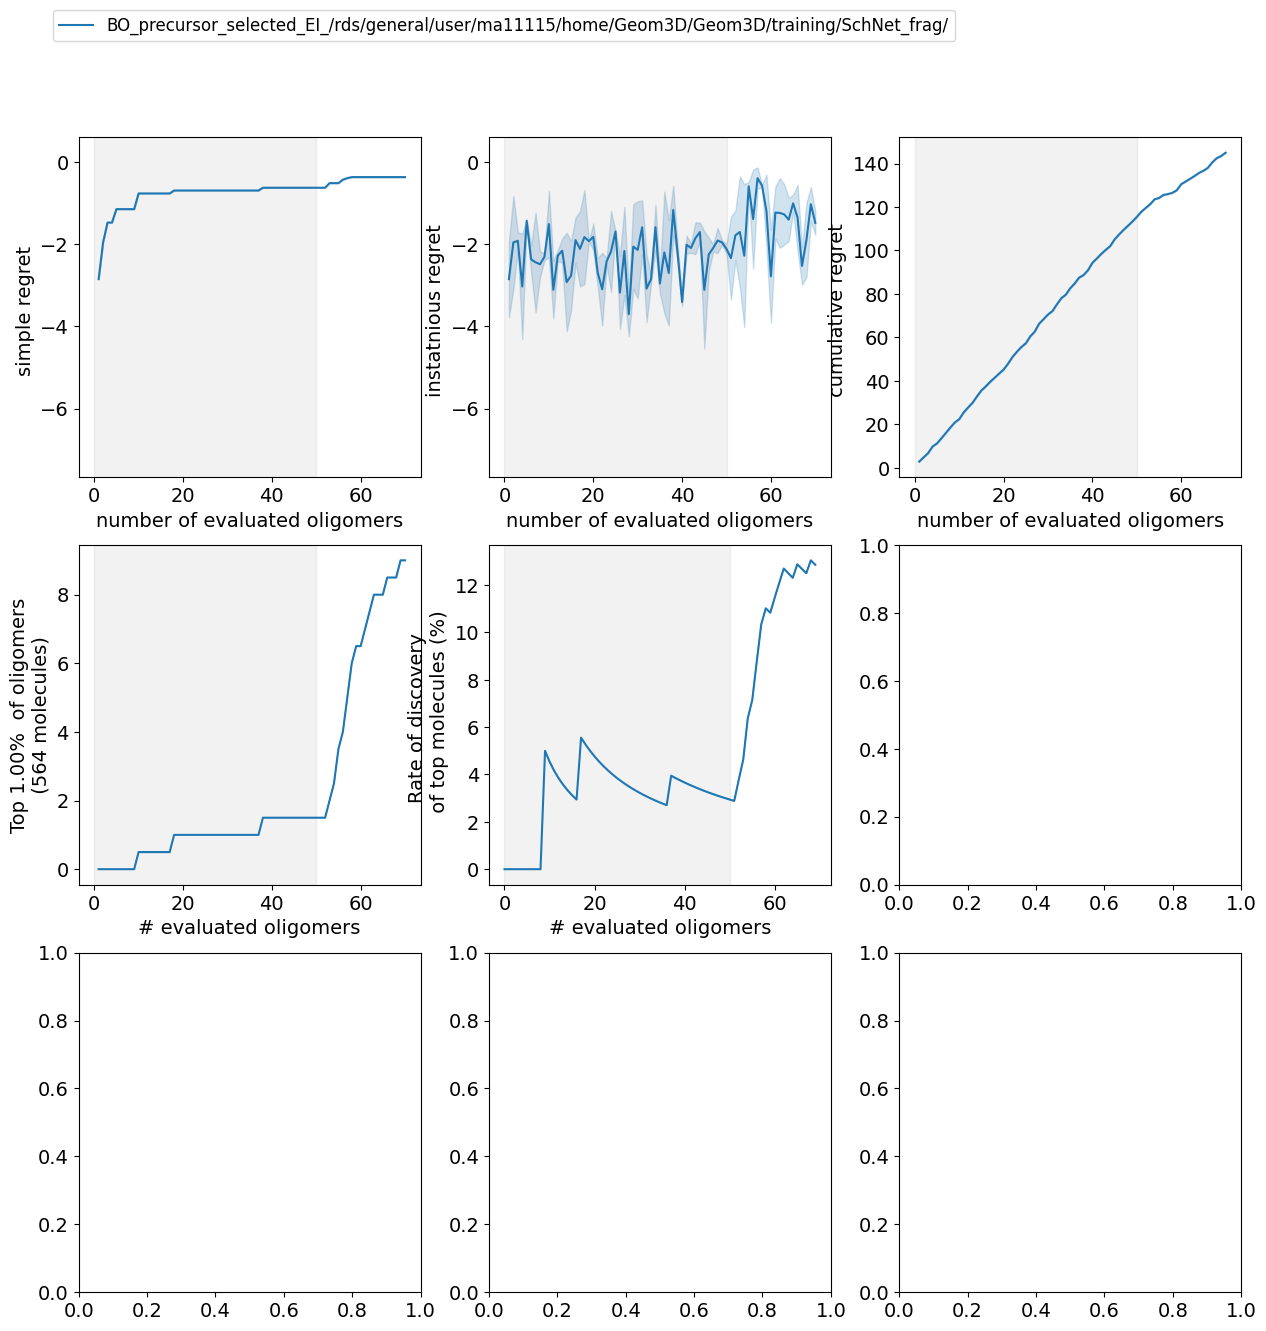

In [164]:
%matplotlib inline
df_plot = df_summary_1.copy()
df_plot = df_plot.iloc[[0]]
fig, axes,metric_dict_res = plot_results_all.plot_metric(df_plot,plot_function_list_single,results_dict,df_list,nb_iterations=70)

